In [1]:
import numpy as np
import matplotlib.pyplot as plt

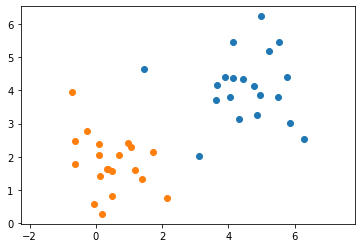

In [2]:
logistic = lambda x: 1/(1+np.exp(-x))

np.random.seed(0)
X1 = np.random.randn(20, 2)+np.array([4, 4])
X2 = np.random.randn(20, 2)+np.array([1, 2])

plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.axis("equal")

def get_logistic_loss(X1, X2, a, b, c):
    return np.sum(logistic(a*X1[:, 0]+b*X1[:, 1] + c)**2) + np.sum((1-logistic(a*X2[:, 0]+b*X2[:, 1] + c))**2)

def plot_logistic_regression_predictions(X1, X2, a, b, c):
    plt.scatter(X1[:, 0], X1[:, 1])
    plt.scatter(X2[:, 0], X2[:, 1])
    X = np.concatenate((X1, X2), axis=0)
    xmin = np.min(X, axis=0)
    xmax = np.max(X, axis=0)
    iv = max(xmax[1]-xmin[1], xmax[0]-xmin[0])
    
    p0 = -c*np.array([a, b])/(a**2 + b**2)
    v = np.array([-b, a])
    mag = np.sqrt(np.sum(v**2))
    if mag > 0:
        v = v/mag
        p = p0 - 2*iv*v
        q = p0 + 2*iv*v
        plt.plot([p[0], q[0]], [p[1], q[1]])
        rg = xmax[0] - xmin[0]
        plt.xlim([xmin[0]-0.2*rg, xmax[0]+0.2*rg])
        rg = xmax[1] - xmin[1]
        plt.ylim([xmin[1]-0.2*rg, xmax[1]+0.2*rg])

        wrong = 0
        for x in X1:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C0')
            if y > 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C0', marker='x')
                wrong += 1
        for x in X2:
            y = logistic(a*x[0] + b*x[1] + c)
            proj = p0 + np.sum(v*(x-p0))*v
            plt.plot([x[0], proj[0]], [x[1], proj[1]], c='C1')
            if y < 0.5:
                plt.scatter([x[0]], [x[1]], 200, c='C1', marker='x')
                wrong += 1
        loss = get_logistic_loss(X1, X2, a, b, c)
        N = X.shape[0]
        plt.title("a = {:.3f}, b = {:.3f}, c = {:.3f}\nLoss = {:.3f}, {} Wrong ({} % Accuracy)".format(a, b, c, loss, wrong, int(100*(N-wrong)/N)))
        plt.axis("equal")

<ipython-input-2-d393a34b1ef4>:22: RuntimeWarning: invalid value encountered in true_divide
  p0 = -c*np.array([a, b])/(a**2 + b**2)


Text(0.5, 0, 'Iteration')

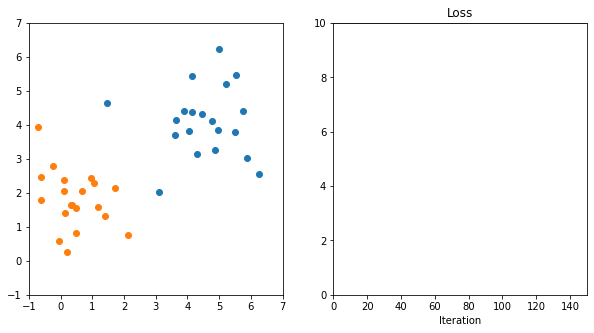

In [3]:
losses = []
steps = []
step = 0.01
n_iters = 150
a = 0
b = 0
c = 0
X = np.concatenate((X1, X2))
y = np.concatenate((np.zeros(X1.shape[0]), np.ones(X2.shape[0])))
plt.figure(figsize=(10, 5))
for it in range(n_iters):
    ## TODO: Update a, b, and c with Gradient descent
    f = logistic(a*X[:, 0] + b*X[:, 1] + c)
    ## TODO: Fill this in to perform gradient descent on a, b, and c
    steps.append([a, b])
    loss = get_logistic_loss(X1, X2, a, b, c)
    losses.append(loss)
    
plt.clf()
plt.subplot(121)
plot_logistic_regression_predictions(X1, X2, a, b, c)
plt.xlim([-1, 7])
plt.ylim([-1, 7])
plt.subplot(122)
plt.plot(losses)
plt.xlim([0, n_iters])
plt.ylim([0, np.max(losses)])
plt.title("Loss")
plt.xlabel("Iteration")